<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [5]:
df["CompTotal"]

0         61000.0
1        138000.0
2         90000.0
3         29000.0
4         90000.0
           ...   
11393    130000.0
11394     74400.0
11395    105000.0
11396     80000.0
11397         NaN
Name: CompTotal, Length: 11398, dtype: float64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


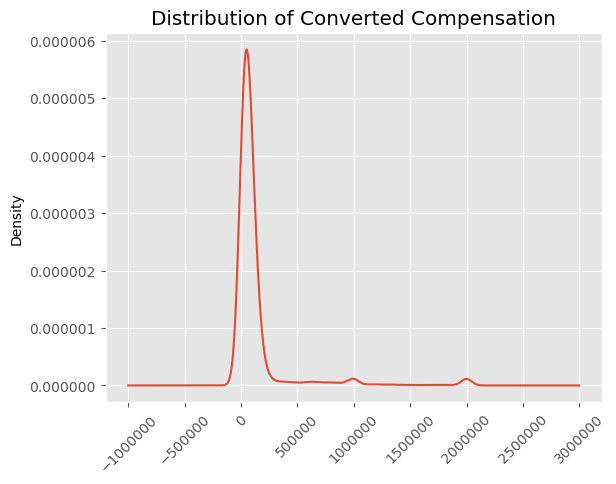

In [20]:
# your code goes here
df["ConvertedComp"].plot(kind="kde",title="Distribution of Converted Compensation",rot=45)
plt.ticklabel_format(style='plain')


Plot the histogram for the column `ConvertedComp`.


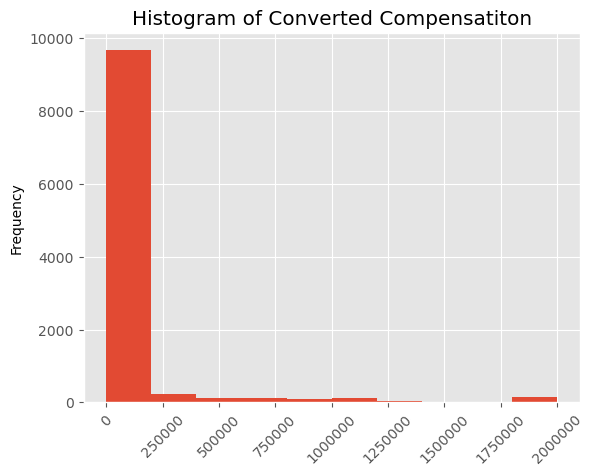

In [28]:
# your code goes here
df["ConvertedComp"].plot.hist(title= "Histogram of Converted Compensatiton", rot=45)
plt.ticklabel_format(style='plain')

What is the median of the column `ConvertedComp`?


In [9]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

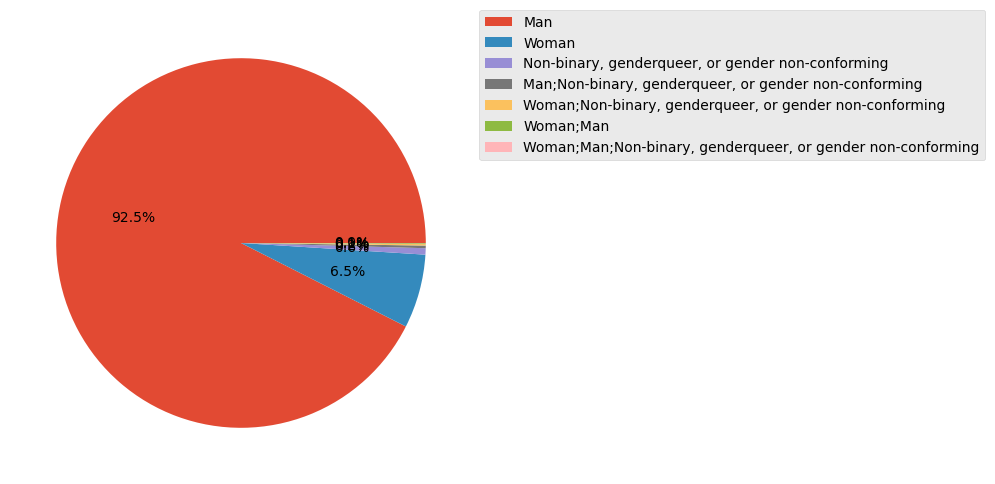

In [36]:
# your code goes here
df["Gender"].value_counts().plot(kind="pie",figsize=(6,6),autopct='%1.1f%%',legend=True,ylabel="",labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes here
df.loc[df["Gender"]=="Woman",["ConvertedComp"]].median()

ConvertedComp    57708.0
dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [29]:
# your code goes here
print(df["Age"].describe())
df[["Age"]].median()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Age    29.0
dtype: float64

Plot a histogram of the column `Age`.


<Axes: title={'center': 'Age Histogram'}, ylabel='Frequency'>

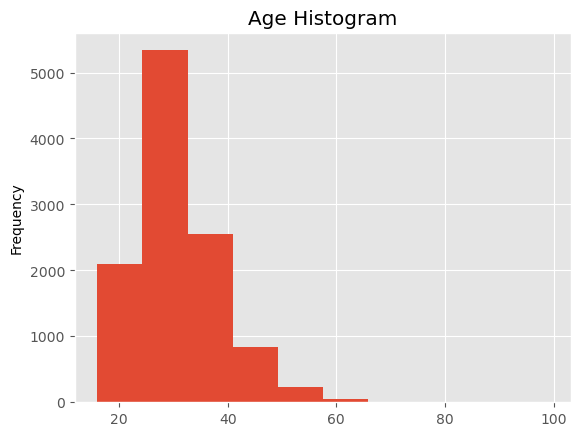

In [16]:
df["Age"].plot.hist(title="Age Histogram")

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

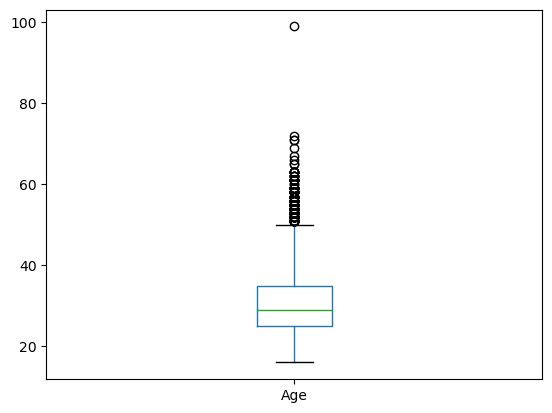

In [13]:
df["Age"].plot(kind="box")

<Axes: >

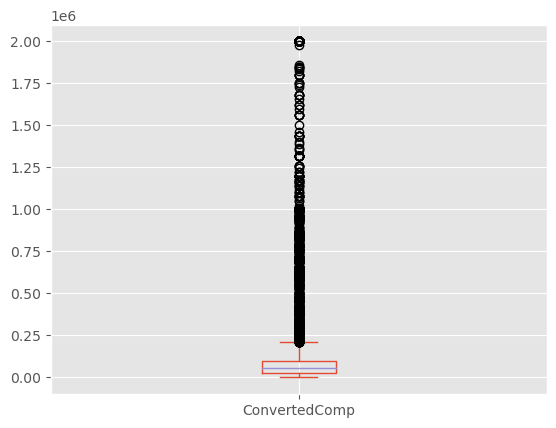

In [38]:
# your code goes here
df["ConvertedComp"].plot(kind="box")


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [39]:
# your code goes here
q = df["ConvertedComp"].quantile([0.25,0.75]).to_list()
IQR = q[1]-q[0]
q

[26868.0, 100000.0]

In [40]:
IQR

73132.0

Find out the upper and lower bounds.


In [41]:
# your code goes here
lower= q[0]-1.5*IQR
upper = q[1]+1.5*IQR
print(lower,upper)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [42]:
# your code goes here
df.loc[(df["ConvertedComp"]>upper) | (df["ConvertedComp"]<lower),["ConvertedComp"]].count()

ConvertedComp    879
dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [43]:
df.shape

(11398, 85)

In [44]:
# your code goes here
df_new = df.loc[~((df["ConvertedComp"]>upper) | (df["ConvertedComp"]<lower))]
df_new.shape

(10519, 85)

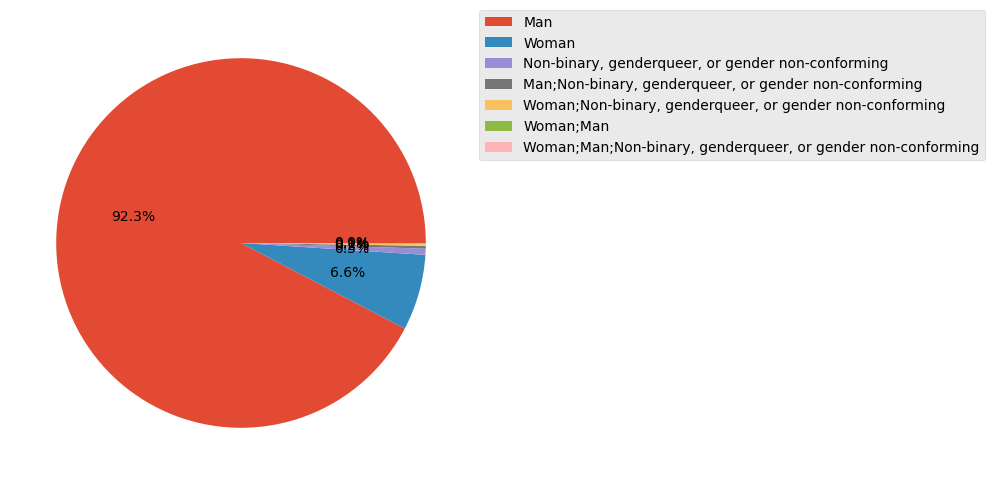

In [45]:
# your code goes here
df_new["Gender"].value_counts().plot(kind="pie",figsize=(6,6),autopct='%1.1f%%',legend=True,ylabel="",labeldistance=None)
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [46]:
df_new["ConvertedComp"].median()

52704.0

In [72]:
df_new.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [69]:
# your code goes here
df_new.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
